**Nama : Widiawati Sihaloho**

**NIM : 24060122120037**

**Praktikum ML LAB C-1**

# **MODUL 6**

**Load Dataset Cars**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [54]:
# Membaca dataset cars
filename = 'cars_clus.csv'
df = pd.read_csv(filename)

df.head()


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


In [55]:
print(df)

    manufact     model   sales  resale    type   price engine_s horsepow  \
0      Acura   Integra  16.919   16.36       0    21.5      1.8      140   
1      Acura        TL  39.384  19.875       0    28.4      3.2      225   
2      Acura        CL  14.114  18.225       0  $null$      3.2      225   
3      Acura        RL   8.588  29.725       0      42      3.5      210   
4       Audi        A4  20.397  22.255       0   23.99      1.8      150   
..       ...       ...     ...     ...     ...     ...      ...      ...   
154    Volvo       V70  17.531  $null$       0    28.8      2.4      168   
155    Volvo       C70   3.493  $null$       0    45.5      2.3      236   
156    Volvo       S80  18.969  $null$       0      36      2.9      201   
157      NaN    newCar  $null$  $null$  $null$    21.5      1.5       76   
158      NaN  newTruck  $null$  $null$  $null$    34.2      3.5      167   

    wheelbas width length curb_wgt fuel_cap mpg lnsales  partition  
0      101.2  67.3

In [56]:

# Ganti $null$ dengan NaN
df.replace('$null$', np.nan, inplace=True)

# Pilih fitur yang akan digunakan
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas',
            'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']

# Pilih kolom fitur dan hapus baris dengan NaN
X = df[features].dropna()

# Konversi semua data menjadi float
X = X.astype(float)

Kode tersebut berfungsi untuk membersihkan data dan mempersiapkannya sebelum analisis atau pemrosesan lebih lanjut. Langkah pertama adalah mengganti semua nilai $null$ dalam dataset dengan NaN, karena $null$ dalam dataset berupa string dan tidak dikenali sebagai missing value oleh pandas. Dengan menggantinya menggunakan fungsi replace, nilai tersebut diubah menjadi np.nan, yang memungkinkan fungsi seperti dropna() untuk menghapus baris yang mengandung nilai NaN.

Setelah itu, dipilih kolom-kolom fitur yang relevan untuk analisis, yaitu kolom numerik yang terdaftar dalam variabel features. Data pada kolom ini disaring untuk menghapus semua baris yang memiliki missing value menggunakan fungsi dropna(). Langkah ini memastikan bahwa hanya data lengkap yang digunakan untuk analisis lebih lanjut.

Terakhir, seluruh data dalam kolom yang telah disaring dikonversi ke tipe float menggunakan fungsi astype(float). Konversi ini penting karena algoritma analisis data atau machine learning biasanya hanya bekerja dengan tipe data numerik. Dengan langkah-langkah ini, dataset menjadi lebih bersih dan siap digunakan untuk proses analisis berikutnya.

**Standarisasi Data**

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-0.56455364 -0.14464769 -0.31723012 -1.18851919 -0.70760105 -0.76427293
  -1.10660259 -1.11075197 -1.15208399 -1.2208532   0.88524147]
 [-0.26396817  0.15952517  0.17251014  0.14398898  0.74935391  0.09649372
  -0.25312531  0.37576661  0.32449122 -0.16219228  0.20113809]
 [-0.67602381  1.01190147  1.13779531  0.42952644  0.49224421  0.90736086
   0.05981636  0.64406509  0.88451349  0.0495399  -0.4829653 ]
 [-0.51801741  0.36548005 -0.14049777 -1.18851919 -0.53619459 -0.58962463
  -0.85055941 -0.7046786  -0.54833627 -0.37392447  0.65720701]
 [-0.53965314  0.47797642  0.56643166 -0.23672764  0.32083775  0.171343
   1.39693076  0.31050482  0.39848816  0.18187252 -0.4829653 ]]


**Proyeksi PCA ke 2D**

In [58]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

*Visualisasi Proyeksi 2D*

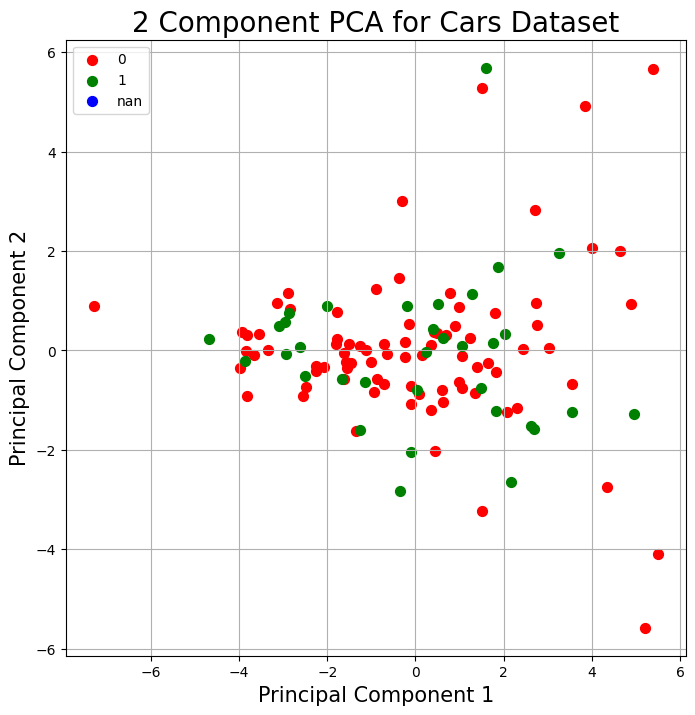

In [59]:


# Menggabungkan DataFrame principalDf dengan kolom 'partition' dari df
finalDf = pd.concat([principalDf, df[['partition', 'type']]], axis=1)

# Membuat figure dan axis untuk plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

# Set labels dan title untuk plot
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA for Cars Dataset', fontsize=20)

# Mendefinisikan targets (kategori 'type' pada dataset cars) dan warna untuk setiap kategori
targets = df['type'].unique()  # Mengambil semua jenis mobil yang berbeda dalam kolom 'type'
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Sesuaikan jumlah warna dengan jumlah kategori

# Loop untuk setiap target class dan plot titik-titiknya
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['type'] == target  # Memilih data berdasarkan kategori 'type'
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, label=target, s=50)

# Menambahkan legend dan grid ke plot
ax.legend(targets)
ax.grid()

# Menampilkan plot
plt.show()


Grafik "2 Component PCA for Cars Dataset" yang ditampilkan menunjukkan hasil dari proses Principal Component Analysis (PCA), yang mereduksi data berdimensi tinggi menjadi dua komponen utama, yakni *Principal Component 1* (sumbu X) dan *Principal Component 2* (sumbu Y). Grafik ini menggambarkan distribusi data yang telah distandardisasi, dengan titik-titik yang dikelompokkan berdasarkan kategori yang ditunjukkan dalam legenda: merah untuk kategori 0, hijau untuk kategori 1, dan biru untuk data yang hilang atau kategori NaN. Dari visualisasi ini, terlihat bahwa sebagian besar titik data terkonsentrasi di sekitar pusat koordinat (sekitar (0, 0)), sementara beberapa titik menyebar lebih jauh, menunjukkan kemungkinan adanya outlier atau data yang berbeda signifikan. Kategori merah dan hijau tidak terpisah secara jelas, yang mengindikasikan bahwa data dalam kedua kategori ini mungkin memiliki pola distribusi yang serupa, sehingga sulit dibedakan hanya dengan dua komponen utama yang dipilih. Warna biru yang mewakili data yang hilang (NaN) juga muncul dalam plot, mengonfirmasi adanya data yang belum terisi atau tidak dapat dikategorikan. Secara keseluruhan, meskipun PCA berhasil mereduksi dimensi dan memvisualisasikan data dalam dua dimensi, pemisahan antara kategori tidak terlalu jelas, yang menunjukkan bahwa mungkin diperlukan fitur tambahan atau metode analisis lain untuk membedakan kategori dengan lebih baik.

**Variansi yang dijelaskan**

In [60]:
pca.explained_variance_ratio_

array([0.5481677 , 0.22568975])

Hasil dari analisis PCA menunjukkan bahwa dua komponen utama yang dipilih dapat menjelaskan sebagian besar variansi dalam data. Berdasarkan nilai explained_variance_ratio_, komponen pertama menjelaskan sekitar 54.82% dari total variansi data, sementara komponen kedua menjelaskan 22.57%. Ini berarti bahwa kedua komponen utama ini bersama-sama menyumbang sekitar 77.39% dari informasi atau variansi dalam dataset, yang menunjukkan bahwa PCA berhasil mereduksi dimensi data dengan mempertahankan sebagian besar informasi penting.

In [61]:
# Membuat DataFrame untuk hasil PCA (2 komponen utama)
columns_pca = ['Principal Component 1', 'Principal Component 2']
df_pca = pd.DataFrame(principalComponents, columns=columns_pca)

# Menampilkan DataFrame hasil PCA
print(df_pca)

     Principal Component 1  Principal Component 2
0                -2.838303               0.832592
1                 0.420676               0.379565
2                 1.794607               0.756941
3                -1.775249               0.773108
4                 1.233551               0.245853
..                     ...                    ...
112              -2.960836               0.563034
113              -2.611602               0.076550
114              -1.610288              -0.061117
115              -2.898550               1.145653
116              -2.860814               0.757960

[117 rows x 2 columns]


Setelah reduksi dimensi, hasil PCA disajikan dalam bentuk DataFrame yang mencatat nilai dari dua komponen utama untuk setiap entri data. Kolom-kolom dalam DataFrame ini diberi nama 'Principal Component 1' dan 'Principal Component 2', yang masing-masing mewakili dua dimensi utama yang dihasilkan oleh PCA. Nilai-nilai pada kolom ini adalah proyeksi data asli pada komponen utama yang baru, yang memungkinkan kita untuk memvisualisasikan dan menganalisis data dalam ruang dua dimensi. Misalnya, pada baris pertama, nilai untuk 'Principal Component 1' adalah -2.838303 dan untuk 'Principal Component 2' adalah 0.832592, yang menunjukkan posisi titik data tersebut dalam ruang dua dimensi baru yang terbentuk. DataFrame ini memiliki 117 baris, yang mencakup semua titik data yang telah direduksi dimensinya, memungkinkan analisis lebih lanjut seperti visualisasi atau pengklasifikasian data berdasarkan komponen utama tersebut.